In [1]:
import wspd
import numpy as np
import time
from utils import get_and_add_box, compute_centers

In [2]:
S = 2.0 # separation constant

# Don't provide multiple copies of the same point in the data. The copies will get anyways removed in build_wspd() call. 
data = np.array(((1, 0), (2, 1), (1, 10), (2, 9), (10,4), (11,5), (5,4), (5.5, 3.5)))
data_pts = data.tolist()

nr_pts = len(data_pts) # number of points
dim = len(data_pts[0]) # point dimension

data_pts = [wspd.point(p) for p in data_pts] # move points to point class objects 

tic = time.perf_counter()
dumbells = wspd.build_wspd(nr_pts, dim, S, data_pts) # compute WSPD
toc = time.perf_counter()

print(f"WSPD construction in  {toc - tic:0.4f} seconds and size {len(dumbells)}")

WSPD construction in  0.0001 seconds and size 10


In [3]:
# Compute axes-aligned boxes with centers around (A,B)'s well-separated pairs
boxes = []
for i in range(len(dumbells)):
    get_and_add_box(dumbells,boxes,data,i)
Acenters = []
Bcenters = []
for i in range(len(boxes)):
    compute_centers(boxes, Acenters, Bcenters, i)

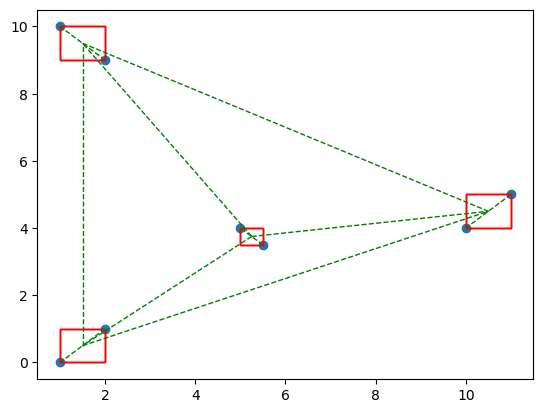

In [4]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

#define Matplotlib figure and axis
fig, ax = plt.subplots()

# plot points
ax.scatter(data[:,0], data[:, 1])

# add rectangles around (A,B) pairs
for lb, rb in boxes:
    lb = lb.tolist()
    rb = rb.tolist()
    l_anchor = ( min(lb[0][0], lb[1][0]), min(lb[0][1], lb[1][1]) )
    r_anchor = ( min(rb[0][0], rb[1][0]), min(rb[0][1], rb[1][1]) )
    l_width, l_height = abs(lb[0][0]-lb[1][0]), abs(lb[0][1]-lb[1][1])
    r_width, r_height = abs(rb[0][0]-rb[1][0]), abs(rb[0][1]-rb[1][1])
    ax.add_patch(Rectangle(l_anchor, l_width, l_height, edgecolor='red', facecolor='none'))
    ax.add_patch(Rectangle(r_anchor, r_width, r_height, edgecolor='red', facecolor='none'))

# add WSPD (A,B) pairs as green dashed lines
for (lc, rc) in zip(Acenters, Bcenters):
    ax.plot((lc[0], rc[0]), (lc[1], rc[1]), color='green', linestyle='dashed', linewidth=1)

ax.plot()
plt.show()